### Cleaning data

Dataset from: [Kaggle: Massive Rotten Tomatoes Movies & Reviews
](https://github.com/lifeparticle/Markdown-Cheatsheet)

#### Clean the text data by removing stopwords, punctuation, and performing lemmatization for reviewText column

#### Installing Required Libraries
This code section installs the necessary libraries: 
1. pandas for data manipulation
2. nltk for natural language processing
3. spacy for advanced NLP
4. ftfy for fixing text encoding issues. 

Additionally, it downloads the English language model for spacy and the stopwords and punkt tokenizer from nltk.

In [8]:
!pip install pandas 
!pip install nltk 
!pip install spacy 

!python -m spacy download en_core_web_sm

!pip install ftfy

import nltk

nltk.download('stopwords')
nltk.download('punkt')

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sebinhwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sebinhwang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Importing Libraries

In [9]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
import re
import html
import ftfy

#### Loading and Filtering the Dataset
This part loads the movie reviews dataset, filters out the reviews before 2010, saves the filtered dataset, reloads it, and prints the shape of the dataframe.

The filtering is done to ensure that the data:
1. Is recent and relevant as reviews and sentiments can change over time
2. Newer data will provide a more accurate insight for current trends and analysis

The standardisation of reviewText to a string type allows for reliable and error-free text processing. This is a crucial step to guarantee that type-related problems are unlikely to occur during  NLP operations.

In [10]:
df = pd.read_csv('rotten_tomatoes_movie_reviews.csv', dayfirst=True, encoding='utf-8')
df = df[df['creationDate'] >= '2010-01-01']
df.to_csv('removed_2010.csv', index=False, encoding='utf-8')

df = pd.read_csv('removed_2010.csv', encoding='utf-8')
df = df.reset_index(drop=True)
# prints tuple rows, columns (just to check how many rows need to be clean)
print(df.shape) 

df['reviewText'] = df['reviewText'].astype(str)

nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words('english'))

(943770, 11)


#### Preparing NLP Model and Stopwords

In [11]:
nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words('english'))

##### 1. Fix Text Encoding Issues
* Encoding Issues: Text data can have encoding problems due to various sources like web scraping, different file encodings, or text that has been copied and pasted multiple times. These issues can result in characters being incorrectly represented (e.g., â€œ instead of “).
* Functionality: ftfy (Fixes Text For You) is a library designed to automatically detect and correct such encoding problems. It ensures the text is in a standard, readable format.
Example:
* Input: "â€œThis is an exampleâ€\x9d"
* Output: “This is an example”.

##### 2. Decode HTML Entities
Purpose:
* HTML Entities: When text is extracted from HTML documents, it often contains HTML entities, which are special characters represented in a coded format (e.g., &amp; for &, &lt; for <).
* Functionality: html.unescape converts these HTML entities back to their corresponding characters, making the text easier to read and process.

Example:
* Input: &amp; &lt; &gt; &quot;
* Output: & < > "

##### 3. Remove Punctuation Not Part of Numbers
Removes punctuation marks that are not part of numbers. Here’s a breakdown of the regex:

(?<!\d): Negative lookbehind assertion ensuring the character before is not a digit.
[^\w\s]: Matches any character that is not a word character (alphanumeric or underscore) or whitespace.
(?!\d): Negative lookahead assertion ensuring the character after is not a digit.
This regex removes punctuation while preserving those used within numbers, such as commas or periods in numerical contexts (e.g., "1,000" or "3.14").

##### 4. Remove Punctuation Not Part of Numbers
Removes spaces within numbers. Here’s a breakdown of the regex:

(?<=\d): Positive lookbehind assertion ensuring the character before is a digit.
\s+: Matches one or more whitespace characters.
(?=\d): Positive lookahead assertion ensuring the character after is a digit.
This regex removes spaces that appear between digits, ensuring that numbers like "1 000" become "1000".

##### 5. Tokenize Text
* Tokenization: This is the process of splitting a string of text into individual words or tokens. Tokenization is a fundamental step in natural language processing (NLP) because it converts raw text into a format that can be easily analysed.
* Functionality: word_tokenize from NLTK splits the text into tokens based on whitespace and punctuation.

Example:
* Input: This is an example sentence.
* Output: ['This', 'is', 'an', 'example', 'sentence', '.']


In [12]:
def clean_text(text, idx, total):
    if idx % 10000 == 0:
        print(f"Cleaning row {idx}/{total}...")

    # Fix encoding issues and decode HTML entities
    text = ftfy.fix_text(text)
    text = html.unescape(text)

    # Regex to remove punctuation, except in the context of numbers
    text = re.sub(r'(?<!\d)[^\w\s](?!\d)', '', text)  # Remove punctuation not part of numbers
    text = re.sub(r'(?<=\d)\s+(?=\d)', '', text)  # Remove spaces within numbers

    # Tokenize text, remove stopwords, and lemmatize
    tokens = word_tokenize(text)
    lemmatized = [token.lemma_ for token in nlp(' '.join(word.lower() for word in tokens if word.lower() not in stop_words))]

    return ' '.join(lemmatized)

In [ ]:
total_rows = len(df)
df['reviewtext_cleaned'] = df.apply(lambda x: clean_text(x['reviewText'], x.name, total_rows), axis=1)
print("All rows are cleaned.")
df.to_csv('cleaned_2010.csv', index=False)

# Import and inspect data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Movie Reviews.csv")


MessageError: Error: credential propagation was unsuccessful

In [ ]:
print(df.head())

                                  id  reviewId creationDate    criticName  \
0  city_hunter_shinjuku_private_eyes   2590987   2019-05-28  Reuben Baron   
1  city_hunter_shinjuku_private_eyes   2558908   2019-02-14   Matt Schley   
2                 dangerous_men_2015   2504681   2018-08-29     Pat Padua   
3                 dangerous_men_2015   2299284   2015-12-13    Eric Melin   
4                 dangerous_men_2015   2295858   2015-11-22   Matt Donato   

   isTopCritic originalScore reviewState       publicatioName  \
0        False           NaN       fresh                  CBR   
1        False         2.5/5      rotten          Japan Times   
2        False           NaN       fresh                DCist   
3        False           4/5       fresh         Lawrence.com   
4        False          7/10       fresh  We Got This Covered   

                                          reviewText scoreSentiment  \
0  The choreography is so precise and lifelike at...       POSITIVE   
1  T

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959440 entries, 0 to 959439
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  959440 non-null  object 
 1   reviewId            959440 non-null  int64  
 2   creationDate        959440 non-null  object 
 3   criticName          959440 non-null  object 
 4   isTopCritic         959440 non-null  bool   
 5   originalScore       634286 non-null  object 
 6   reviewState         959440 non-null  object 
 7   publicatioName      959440 non-null  object 
 8   reviewText          953978 non-null  object 
 9   scoreSentiment      959440 non-null  object 
 10  reviewUrl           932937 non-null  object 
 11  reviewtext_cleaned  953950 non-null  object 
 12  title               955484 non-null  object 
 13  genre               959143 non-null  object 
 14  tomatoMeter         959143 non-null  object 
 15  audienceScore       959143 non-nul

In [ ]:
print(df.isnull().sum())

id                         0
reviewId                   0
creationDate               0
criticName                 0
isTopCritic                0
originalScore         325154
reviewState                0
publicatioName             0
reviewText              5462
scoreSentiment             0
reviewUrl              26503
reviewtext_cleaned      5490
title                   3956
genre                    297
tomatoMeter              297
audienceScore            297
originalLanguage         297
runtimeMinutes         22118
dtype: int64


##Note

**Top Critic:**
* Have reviewed professionally for a minimum of five years
* Critique film/TV on a regular and frequent basis, a minimum of four to six times per month
* Publish reviews at outlets with a verifiable audience demonstrated by:
  * Consistent web traffic with at least five million visits over six months
  * 450k followers on Twitter
  * 500k video subscribers
  * For podcasts, at least 1k ratings and 4 stars on Apple Podcasts

**Fresh VS Rotten Tomatoes (reviewStates) :**
* Fresh: Positive reviews make up 60% or more
* Rotten: Positive reviews are less than 60%

Tomato Meter VS Audience Score
* Tomato Meter: A score to represent the percentage of professional critic reviews that are positive for a given film or television show.
* Audience Score: A score to represent the percentage of users who have rated a movie or TV show positively (verified bought a ticket)

# Data Clean Up
Remove unecessary columns, handling missing value, transform object data type to numeric data types, label encoding

In [ ]:
columns_to_remove = ['id', 'reviewId', 'creationDate', 'originalScore', 'reviewText', 'reviewUrl', 'runtimeMinutes']
df.drop(columns=columns_to_remove, inplace=True)

df = df[(df['tomatoMeter'] != 'unknown') & (df['audienceScore'] != 'unknown') & (df['genre'] != 'unknown')]

df = df.dropna()

df['reviewState'] = df['reviewState'].map({'fresh': 1, 'rotten': 0})
df['scoreSentiment'] = df['scoreSentiment'].map({'POSITIVE': 1, 'NEGATIVE': 0})

df['tomatoMeter'] = pd.to_numeric(df['tomatoMeter'], errors='coerce')
df['audienceScore'] = pd.to_numeric(df['audienceScore'], errors='coerce')

NameError: name 'df' is not defined

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
test_df.info()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172293 entries, 333723 to 393717
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   criticName          172293 non-null  object 
 1   isTopCritic         172293 non-null  bool   
 2   reviewState         172293 non-null  int64  
 3   publicatioName      172293 non-null  object 
 4   scoreSentiment      172293 non-null  int64  
 5   reviewtext_cleaned  172293 non-null  object 
 6   title               172293 non-null  object 
 7   genre               172293 non-null  object 
 8   tomatoMeter         172293 non-null  float64
 9   audienceScore       172293 non-null  float64
 10  originalLanguage    172293 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 14.6+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 689169 entries, 72658 to 135279
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  --

# EDA 1 -  Vocabulary Correlation with Review Sentiment.
This sections explores the correlation between written text reviews and sentiment scores of movies.    

## Data Manipulation
Vectorize review texts, and calculate correlation coefficients


In [ ]:
positive_df = train_df[train_df['scoreSentiment'] == 1].copy()
negative_df = train_df[train_df['scoreSentiment'] == 0].copy()

positive_sample = positive_df.sample(frac=0.7, random_state=42)

balanced_sample = pd.concat([positive_sample, negative_df])

EDA1_sample = balanced_sample[['scoreSentiment', 'reviewtext_cleaned']]
value_counts = EDA1_sample['scoreSentiment'].value_counts()

print(EDA1_sample.info())
print(value_counts)

<class 'pandas.core.frame.DataFrame'>
Index: 544624 entries, 481328 to 60700
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   scoreSentiment      544624 non-null  int64 
 1   reviewtext_cleaned  544624 non-null  object
dtypes: int64(1), object(1)
memory usage: 12.5+ MB
None
scoreSentiment
1    337272
0    207352
Name: count, dtype: int64


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd

vectorizer = TfidfVectorizer()
x_tfidf = vectorizer.fit_transform(EDA1_sample['reviewtext_cleaned'])


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_tfidf, EDA1_sample['scoreSentiment'])

coefficients = log_reg.coef_[0]

coef_df = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'coefficient': coefficients})

coef_df['abs_coefficient'] = np.abs(coef_df['coefficient'])
coef_df_sorted = coef_df.sort_values(by='abs_coefficient', ascending=False)

print(coef_df_sorted)

                  word  coefficient  abs_coefficient
134608   unfortunately    -8.885604         8.885604
41953             fail    -8.421888         8.421888
134643         unfunny    -6.902735         6.902735
13665            bland    -6.794953         6.794953
97766           poorly    -6.713211         6.713211
...                ...          ...              ...
81304         mohammed     0.000017         0.000017
106532         rightit    -0.000014         0.000014
78237       megalizard     0.000011         0.000011
126813         telefon    -0.000008         0.000008
47746   frontandcenter     0.000005         0.000005

[144882 rows x 3 columns]


In [ ]:
file_path = 'coefficients.csv'
coef_df_sorted.to_csv(file_path, index=False)

In [ ]:
significant_coef_df = coef_df_sorted[coef_df_sorted['abs_coefficient'] > 1]

print(significant_coef_df)

                 word  coefficient  abs_coefficient
134608  unfortunately    -8.885604         8.885604
41953            fail    -8.421888         8.421888
134643        unfunny    -6.902735         6.902735
13665           bland    -6.794953         6.794953
97766          poorly    -6.713211         6.713211
...               ...          ...              ...
60881        illjudge    -1.000277         1.000277
102940         ramble    -1.000203         1.000203
83697            muse     1.000086         1.000086
137887         virtue     1.000077         1.000077
21213       cheapness    -1.000038         1.000038

[5894 rows x 3 columns]


In [ ]:
file_path = 'sig_coefficients.csv'
significant_coef_df.to_csv(file_path, index=False)

## Visualizing EDA 1
Observe the correlation of individual words to negative or positive sentiments

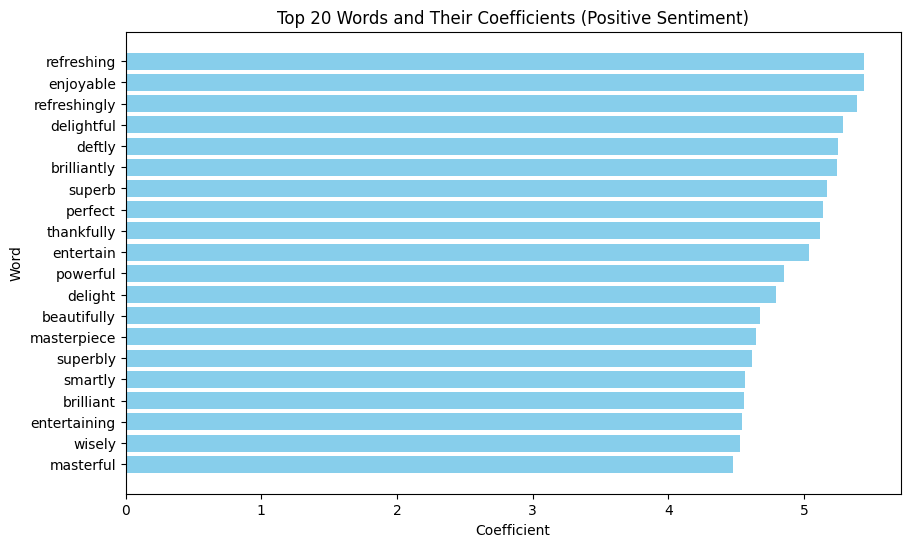

In [ ]:
import matplotlib.pyplot as plt

significant_coef_df = significant_coef_df.sort_values(by='coefficient', ascending=False)

top_n = 20
top_words = significant_coef_df['word'].head(top_n)
top_coefficients = significant_coef_df['coefficient'].head(top_n)


plt.figure(figsize=(10, 6))
plt.barh(top_words, top_coefficients, color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Word')
plt.title(f'Top {top_n} Words and Their Coefficients (Positive Sentiment)')
plt.gca().invert_yaxis()
plt.show()


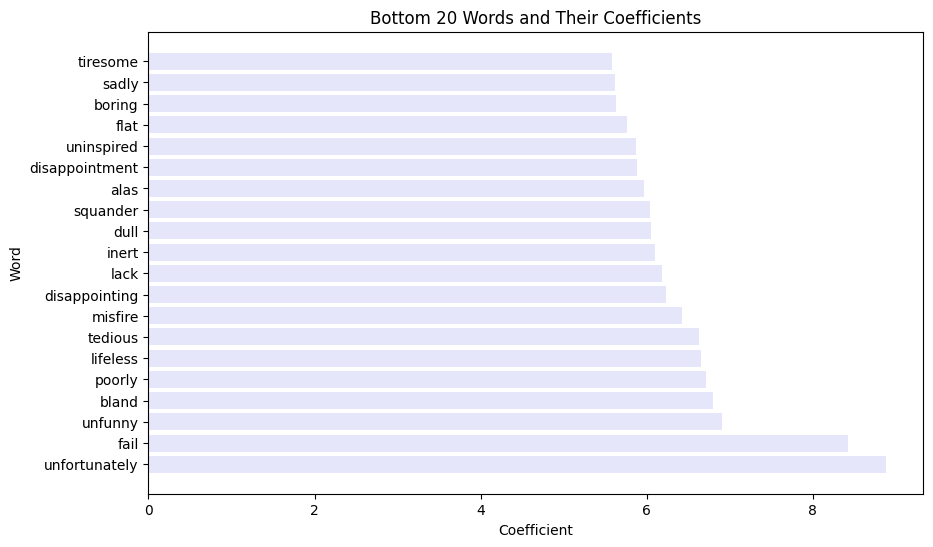

In [ ]:
bottom_n = 20
bottom_words = significant_coef_df['word'].tail(bottom_n)
bottom_coefficients = significant_coef_df['abs_coefficient'].tail(bottom_n)

plt.figure(figsize=(10, 6))
plt.barh(bottom_words, bottom_coefficients, color='lavender')
plt.xlabel('Coefficient')
plt.ylabel('Word')
plt.title(f'Bottom {bottom_n} Words and Their Coefficients')
plt.gca().invert_yaxis()
plt.show()


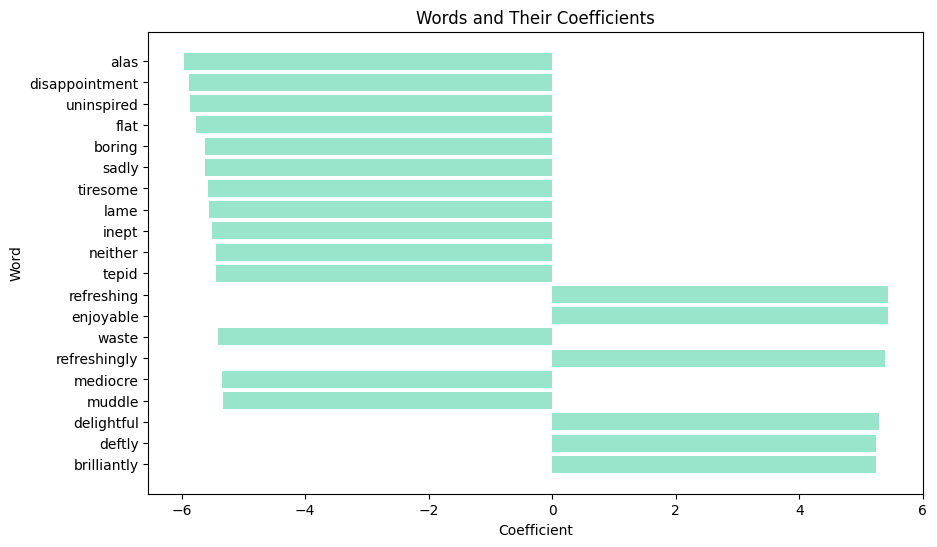

In [ ]:
# Specify range of ABSOLUTE significant coefficient

min_coefficient = 2
max_coefficient = 6
filtered_df = significant_coef_df[(significant_coef_df['abs_coefficient'] >= min_coefficient) &
                                   (significant_coef_df['abs_coefficient'] <= max_coefficient)]

filtered_df = filtered_df.sort_values(by='abs_coefficient', ascending=False)

top_n = 20
top_words = filtered_df['word'].head(top_n)
top_coefficients = filtered_df['coefficient'].head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_words, top_coefficients, color=(0.2, 0.8, 0.6, 0.5))
plt.xlabel('Coefficient')
plt.ylabel('Word')
plt.title(f'Words and Their Coefficients')
plt.gca().invert_yaxis()
plt.show()


### Analysis
- Deprecatory texts are more strongly associated with negative sentiment reviews
- Appriciative and complimetary text are associated with positive sentiment reviews

#EDA 2 - Correlation of Quantitative Reviews
This section explores the correlation between reviewState, tomatoMeter, audienceScore, and scoreSentiment to understand the relationships between them.

## Visualizing EDA 2

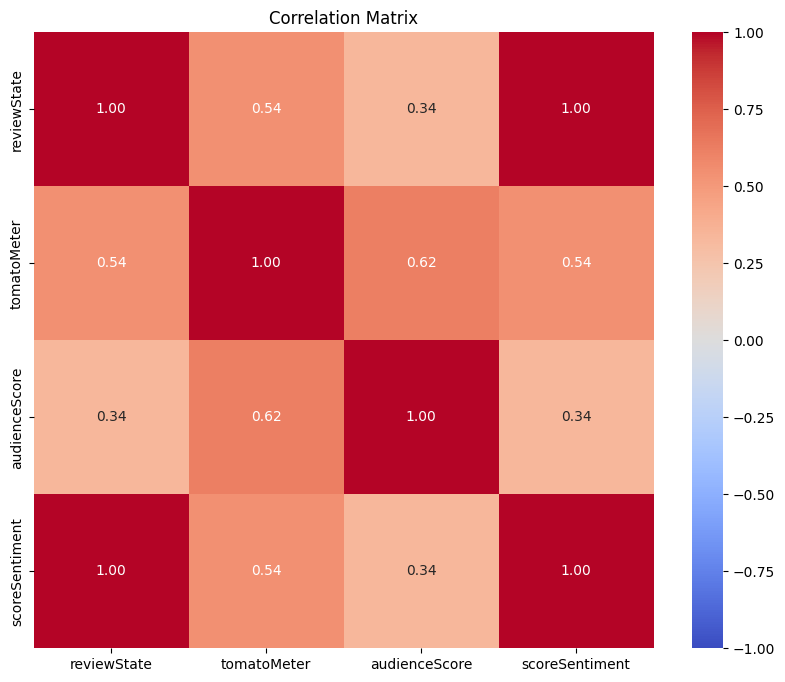

In [ ]:
import seaborn as sns

selected_columns = ['reviewState', 'tomatoMeter', 'audienceScore', 'scoreSentiment']
correlation_matrix = train_df[selected_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


### Analysis
- reviewStates, tomatoMater, audienceScore, and scoreSentiments all have moderate to strong positive correlation to each other. This highlights the consistency and of the reviews and ratings in the dataset

# EDA 3 - Genre Exploration and Analysis
This section explores the genres in the dataset and visualize the distribution of different genres by identify the most common ones.



## Data Manipulation

In [ ]:
import pandas as pd

df_exploded_genres = train_df.copy()

df_exploded_genres['genre'] = df_exploded_genres['genre'].str.replace("[", "").str.replace("]", "").str.replace("'", "")
df_exploded_genres['genre'] = df_exploded_genres['genre'].apply(lambda x: x.split(', '))
df_exploded_genres = df_exploded_genres.explode('genre')

genre_counts = df_exploded_genres['genre'].value_counts()

genre_counts_df = genre_counts.reset_index()
genre_counts_df.columns = ['Genre', 'Frequency']
genre_counts_df.to_csv('genre_counts.csv', index=False)

print(genre_counts)


genre
Drama                 323493
Comedy                202273
Mystery & thriller    155745
Action                116300
Adventure             109538
Horror                 70051
Fantasy                69078
Romance                63543
Documentary            63030
Sci-fi                 53606
Biography              43434
Crime                  41520
History                37741
Kids & family          37226
Animation              28591
Lgbtq+                 18351
Music                  15254
Musical                14347
War                    12664
Western                 7655
Holiday                 7401
Anime                   2950
Stand-up                 463
Sports & fitness         146
Sports                   116
Nature                    44
Short                     30
Foreign                   25
Special interest          18
Variety                    7
News                       4
Entertainment              4
Name: count, dtype: int64


## Visualizing EDA 3

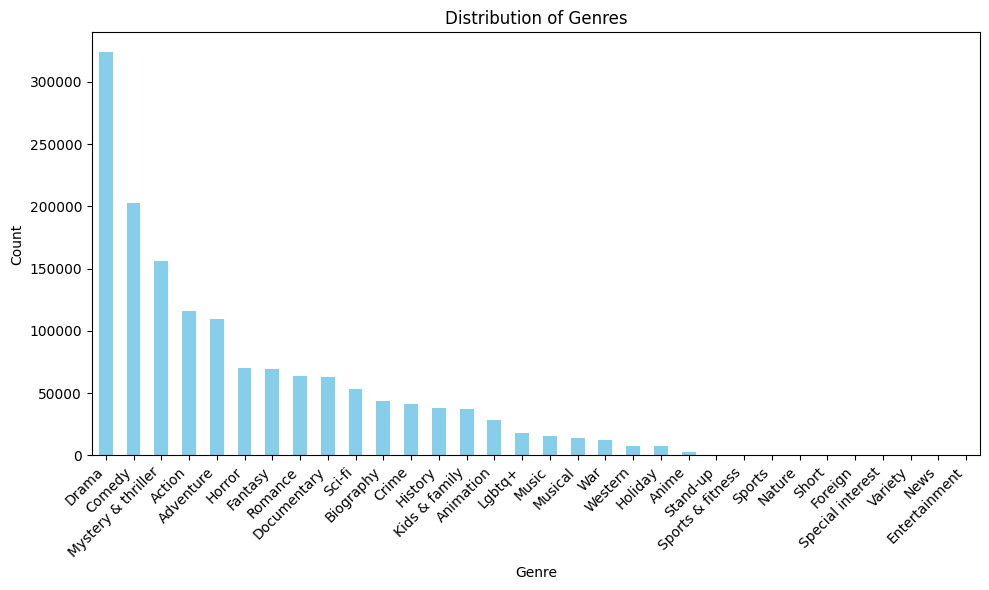

In [ ]:
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

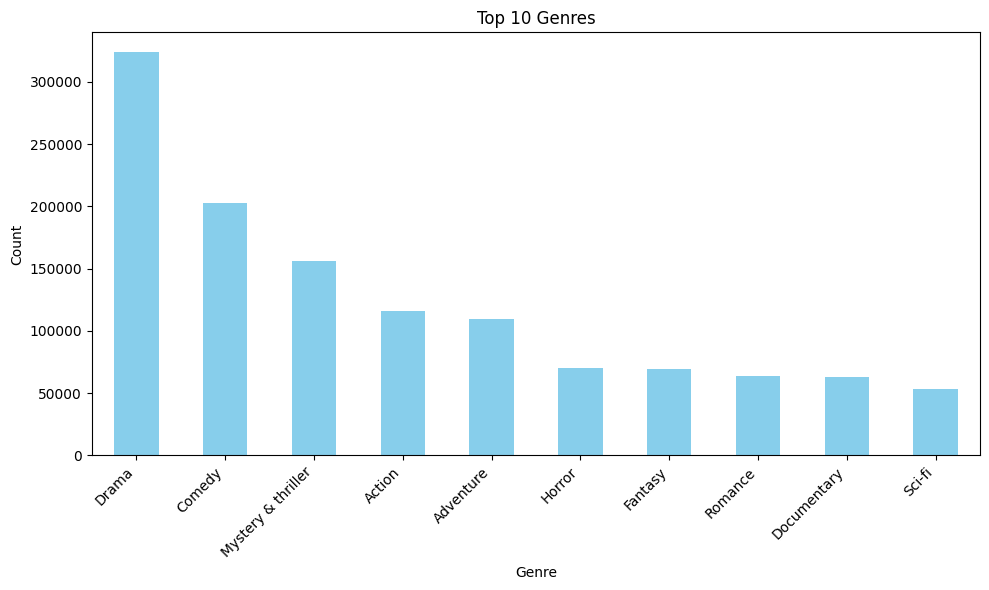

In [ ]:
plt.figure(figsize=(10, 6))
top_20_genres = genre_counts.head(10)
top_20_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#EDA 4 - Exploration of Score Distribution
This section explores the distribution of reviews from top and regular critics, analyze if there is any difference in sentiment or ratings between reviews from each critics group.


## Visualizing EDA 4

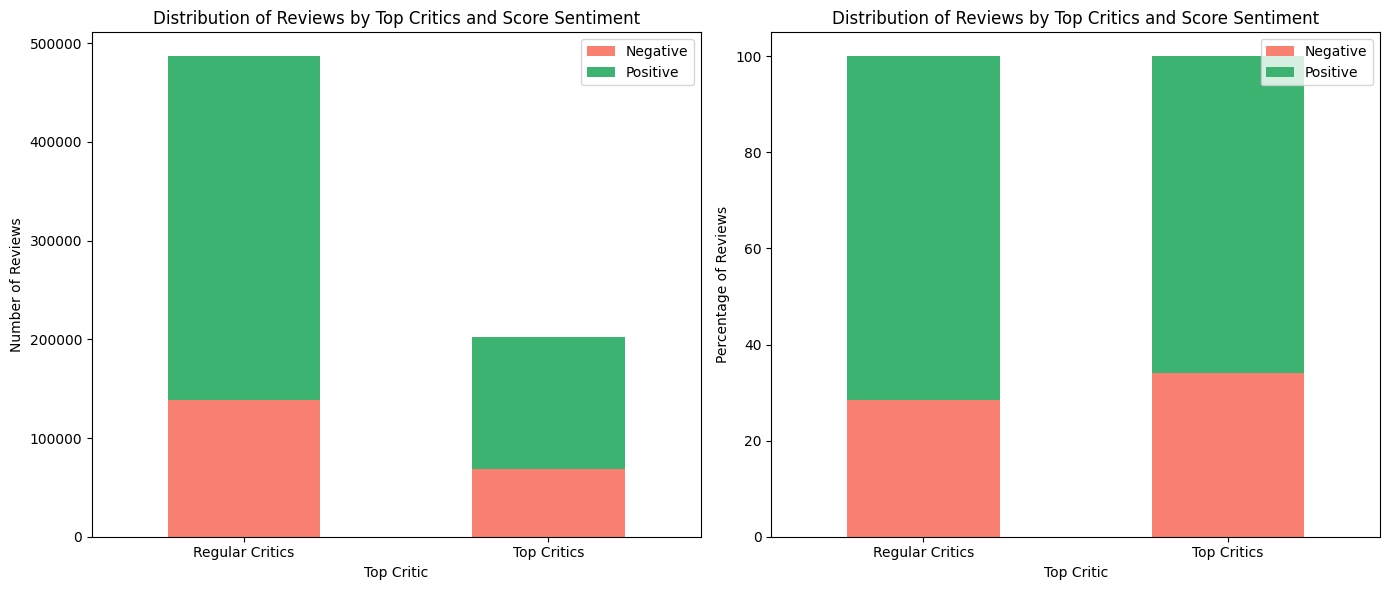

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Subplot - left
review_counts = train_df.groupby(['isTopCritic', 'scoreSentiment']).size().unstack()
ax = review_counts.plot(kind='bar', stacked=True, color=['salmon', 'mediumseagreen'], ax=axs[0])
ax.set_title('Distribution of Reviews by Top Critics and Score Sentiment')
ax.set_xlabel('Top Critic')
ax.set_ylabel('Number of Reviews')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Regular Critics', 'Top Critics'], rotation=0)
ax.legend(['Negative', 'Positive'], loc='upper right')

# Subplot - right
total_reviews = review_counts.sum(axis=1)

percentage_negative = review_counts[0] / total_reviews * 100
percentage_positive = review_counts[1] / total_reviews * 100

ax = pd.concat([percentage_negative, percentage_positive], axis=1).plot(kind='bar', stacked=True, color=['salmon', 'mediumseagreen'], ax=axs[1])
ax.set_title('Distribution of Reviews by Top Critics and Score Sentiment By percentage')
ax.set_xlabel('Top Critic')
ax.set_ylabel('Percentage of Reviews')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Regular Critics', 'Top Critics'], rotation=0)
ax.legend(['Negative', 'Positive'], loc='upper right')

plt.tight_layout()
plt.show()


<ipython-input-69-aa3f11378b0f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isTopCritic', y='tomatoMeter', data=df, palette=['lightsalmon', 'lightblue'])
<ipython-input-69-aa3f11378b0f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isTopCritic', y='audienceScore', data=df, palette=['lightsalmon', 'lightblue'])


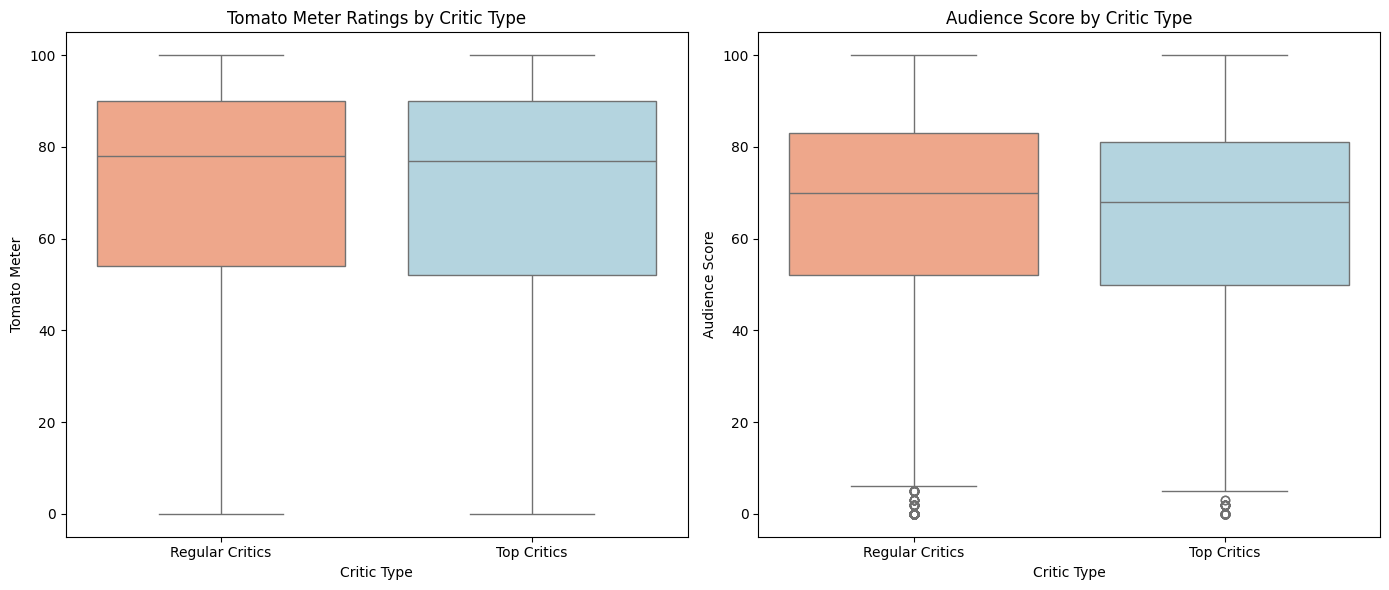

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Subplot - left
plt.subplot(1, 2, 1)
sns.boxplot(x='isTopCritic', y='tomatoMeter', data=df, palette=['lightsalmon', 'lightblue'])
plt.title('Tomato Meter Ratings by Critic Type')
plt.xlabel('Critic Type')
plt.ylabel('Tomato Meter')
plt.xticks(ticks=[0, 1], labels=['Regular Critics', 'Top Critics'])

# Subplot - right
plt.subplot(1, 2, 2)
sns.boxplot(x='isTopCritic', y='audienceScore', data=df, palette=['lightsalmon', 'lightblue'])
plt.title('Audience Score by Critic Type')
plt.xlabel('Critic Type')
plt.ylabel('Audience Score')
plt.xticks(ticks=[0, 1], labels=['Regular Critics', 'Top Critics'])


plt.tight_layout()
plt.show()


### Analysis
- Similar distributions can be seen between Regular Critics group and Top Critics group in terms of Score Sentiments, Tomato Meter Ratings, and Audience Score

#### Hypothesis Testing

In [24]:
import pandas as pd
df = pd.read_csv("final_2010_data_unknown.csv")

In [25]:
print(df.head())

                                  id  reviewId creationDate    criticName  \
0  city_hunter_shinjuku_private_eyes   2590987   2019-05-28  Reuben Baron   
1  city_hunter_shinjuku_private_eyes   2558908   2019-02-14   Matt Schley   
2                 dangerous_men_2015   2504681   2018-08-29     Pat Padua   
3                 dangerous_men_2015   2299284   2015-12-13    Eric Melin   
4                 dangerous_men_2015   2295858   2015-11-22   Matt Donato   

   isTopCritic originalScore reviewState       publicatioName  \
0        False           NaN       fresh                  CBR   
1        False         2.5/5      rotten          Japan Times   
2        False           NaN       fresh                DCist   
3        False           4/5       fresh         Lawrence.com   
4        False          7/10       fresh  We Got This Covered   

                                          reviewText scoreSentiment  \
0  The choreography is so precise and lifelike at...       POSITIVE   
1  T

In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959440 entries, 0 to 959439
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  959440 non-null  object 
 1   reviewId            959440 non-null  int64  
 2   creationDate        959440 non-null  object 
 3   criticName          959440 non-null  object 
 4   isTopCritic         959440 non-null  bool   
 5   originalScore       634286 non-null  object 
 6   reviewState         959440 non-null  object 
 7   publicatioName      959440 non-null  object 
 8   reviewText          953978 non-null  object 
 9   scoreSentiment      959440 non-null  object 
 10  reviewUrl           932937 non-null  object 
 11  reviewtext_cleaned  953950 non-null  object 
 12  title               955484 non-null  object 
 13  genre               959143 non-null  object 
 14  tomatoMeter         959143 non-null  object 
 15  audienceScore       959143 non-nul

In [27]:
print(df.isnull().sum())

id                         0
reviewId                   0
creationDate               0
criticName                 0
isTopCritic                0
originalScore         325154
reviewState                0
publicatioName             0
reviewText              5462
scoreSentiment             0
reviewUrl              26503
reviewtext_cleaned      5490
title                   3956
genre                    297
tomatoMeter              297
audienceScore            297
originalLanguage         297
runtimeMinutes         22118
dtype: int64


In [28]:
columns_to_remove = ['id', 'reviewId', 'creationDate', 'originalScore', 'reviewText', 'reviewUrl', 'runtimeMinutes']
df.drop(columns=columns_to_remove, inplace=True)

df = df[(df['tomatoMeter'] != 'unknown') & (df['audienceScore'] != 'unknown') & (df['genre'] != 'unknown')]

df = df.dropna()

df['reviewState'] = df['reviewState'].map({'fresh': 1, 'rotten': 0})
df['scoreSentiment'] = df['scoreSentiment'].map({'POSITIVE': 1, 'NEGATIVE': 0})

df['tomatoMeter'] = pd.to_numeric(df['tomatoMeter'], errors='coerce')
df['audienceScore'] = pd.to_numeric(df['audienceScore'], errors='coerce')

In [29]:
# Train Test Split
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

test_df.info()
train_df.info()

test_df.to_csv('test_dataset.csv', index=False)

train_df.to_csv('train_dataset.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 172293 entries, 333723 to 393717
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   criticName          172293 non-null  object 
 1   isTopCritic         172293 non-null  bool   
 2   reviewState         172293 non-null  int64  
 3   publicatioName      172293 non-null  object 
 4   scoreSentiment      172293 non-null  int64  
 5   reviewtext_cleaned  172293 non-null  object 
 6   title               172293 non-null  object 
 7   genre               172293 non-null  object 
 8   tomatoMeter         172293 non-null  float64
 9   audienceScore       172293 non-null  float64
 10  originalLanguage    172293 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 14.6+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 689169 entries, 72658 to 135279
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  --

In [30]:
# EDA 1 - Vocabulary Correlation with Review Sentiment.
positive_df = train_df[train_df['scoreSentiment'] == 1].copy()
negative_df = train_df[train_df['scoreSentiment'] == 0].copy()

positive_sample = positive_df.sample(frac=0.7, random_state=42)

balanced_sample = pd.concat([positive_sample, negative_df])

EDA1_sample = balanced_sample[['scoreSentiment', 'reviewtext_cleaned']]
value_counts = EDA1_sample['scoreSentiment'].value_counts()

print(EDA1_sample.info())
print(value_counts)

<class 'pandas.core.frame.DataFrame'>
Index: 544624 entries, 481328 to 60700
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   scoreSentiment      544624 non-null  int64 
 1   reviewtext_cleaned  544624 non-null  object
dtypes: int64(1), object(1)
memory usage: 12.5+ MB
None
scoreSentiment
1    337272
0    207352
Name: count, dtype: int64


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd

vectorizer = TfidfVectorizer()
x_tfidf = vectorizer.fit_transform(EDA1_sample['reviewtext_cleaned'])

In [37]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_tfidf, EDA1_sample['scoreSentiment'])

coefficients = log_reg.coef_[0]

coef_df = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'coefficient': coefficients})

coef_df['abs_coefficient'] = np.abs(coef_df['coefficient'])

coef_df['sentimentScore'] = np.where(coef_df['coefficient'] > 0, 'POSITIVE', 'NEGATIVE')

coef_df_sorted = coef_df.sort_values(by='abs_coefficient', ascending=False)

print(coef_df_sorted)

                 word   coefficient  abs_coefficient sentimentScore
134608  unfortunately -9.633204e+00     9.633204e+00       NEGATIVE
134643        unfunny -8.398333e+00     8.398333e+00       NEGATIVE
13665           bland -8.088052e+00     8.088052e+00       NEGATIVE
97766          poorly -7.984687e+00     7.984687e+00       NEGATIVE
80664         misfire -7.898966e+00     7.898966e+00       NEGATIVE
...               ...           ...              ...            ...
69509           lacys -5.189359e-06     5.189359e-06       NEGATIVE
114847       showroom -4.685183e-06     4.685183e-06       NEGATIVE
93890          passon  2.424920e-06     2.424920e-06       POSITIVE
106687        ripoffs  2.078835e-06     2.078835e-06       POSITIVE
82784      moviemovie -9.589527e-08     9.589527e-08       NEGATIVE

[144882 rows x 4 columns]


In [38]:
file_path = 'coefficients.csv'
coef_df_sorted.to_csv(file_path, index=False)

In [39]:
significant_coef_df = coef_df_sorted[coef_df_sorted['abs_coefficient'] > 1]

print(significant_coef_df)

                 word  coefficient  abs_coefficient sentimentScore
134608  unfortunately    -9.633204         9.633204       NEGATIVE
134643        unfunny    -8.398333         8.398333       NEGATIVE
13665           bland    -8.088052         8.088052       NEGATIVE
97766          poorly    -7.984687         7.984687       NEGATIVE
80664         misfire    -7.898966         7.898966       NEGATIVE
...               ...          ...              ...            ...
49414            gear    -1.002292         1.002292       NEGATIVE
41499       extremely     1.001656         1.001656       POSITIVE
24960          compel     1.001524         1.001524       POSITIVE
17337            bulk    -1.001495         1.001495       NEGATIVE
138222           void    -1.001046         1.001046       NEGATIVE

[3412 rows x 4 columns]


In [35]:
file_path = 'sig_coefficients.csv'
significant_coef_df.to_csv(file_path, index=False)

In [1]:
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

In [6]:
# Hypothesis Testing 1
hypo_test_1 = pd.read_csv('sig_coefficients.csv')

# Null Hypothesis (H0): Words do not affect the sentiment score
# Alternative Hypothesis (HA): Words affect the sentiment score 

# Separate the data into two groups based on 'sentimentScore'
positive_scores = hypo_test_1[hypo_test_1['sentimentScore'] == 'POSITIVE']['coefficient']
negative_scores = hypo_test_1[hypo_test_1['sentimentScore'] == 'NEGATIVE']['coefficient']

# Perform the t-test
t_statistic, p_value = ttest_ind(positive_scores, negative_scores, equal_var=False)

# Set significance level
alpha = 0.05

print("p value: ")
print(p_value)

if p_value < alpha:
    print("Reject the null hypothesis: Specific keywords affect the sentiment score.")
else:
    print("Accept the null hypothesis: Specific keywords do not affect the sentiment score.")

p value: 
0.0
Reject the null hypothesis: Specific keywords affect the sentiment score.


In [4]:
# Hypothesis Testing 2

hypo_test_2 = pd.read_csv("final_2010_data_unknown.csv")

# Null Hypothesis (H0): There is no significant relationship between scoreSentiment and genre.
# Alternative Hypothesis (HA): There is a significant relationship between scoreSentiment and genre 

contingency_table = pd.crosstab(hypo_test_2['scoreSentiment'], hypo_test_2['genre'])

# Perform the Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Set significance level
alpha = 0.05

print("p value: ")
print(p_value)

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between scoreSentiment and genre.")
else:
    print("Accept the null hypothesis: There is no significant relationship between scoreSentiment and genre.")

0.0
Reject the null hypothesis: There is a significant relationship between scoreSentiment and genre.


In [8]:
# Hypothesis Testing 3

hypo_test_3 = pd.read_csv("final_2010_data_unknown.csv")

# Null Hypothesis (H0): There is no significant relationship between scoreSentiment and originalLanguage
# Alternative Hypothesis (HA): There is a significant relationship between scoreSentiment and originalLanguage 

df_filtered = hypo_test_3[hypo_test_3['originalLanguage'] != 'unknown']

contingency_table = pd.crosstab(df_filtered['scoreSentiment'], df_filtered['originalLanguage'])

chi2, p, dof, ex = chi2_contingency(contingency_table)

# Set significance level
alpha = 0.05

print("p value: ")
print(p_value)

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between scoreSentiment and originalLanguage.")
else:
    print("Accept the null hypothesis: There is no significant relationship between scoreSentiment and originalLanguage.")

p value: 
0.0
Reject the null hypothesis: There is a significant relationship between scoreSentiment and originalLanguage.


In [11]:
# Hypothesis Testing 4

hypo_test_4 = pd.read_csv("final_2010_data_unknown.csv")

# Null Hypothesis (H0): There is no significant relationship between scoreSentiment and isTopCritic
# Alternative Hypothesis (HA): There is a significant relationship between scoreSentiment and isTopCritic

contingency_table = pd.crosstab(hypo_test_4['scoreSentiment'], hypo_test_4['isTopCritic'])

chi2, p, dof, ex = chi2_contingency(contingency_table)

# Set significance level
alpha = 0.05

print("p value: ")
print(p_value)

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between scoreSentiment and isTopCritic.")
else:
    print("Accept the null hypothesis: There is no significant relationship between scoreSentiment and  isTopCritic.")

p value: 
0.0
Reject the null hypothesis: There is a significant relationship between scoreSentiment and isTopCritic.


#### Model

In [29]:
import numpy as np
from numpy import array
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.utils import compute_class_weight
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

In [30]:
movie_reviews = pd.read_csv('final_2010_data_0.csv', usecols=['reviewtext_cleaned', 'scoreSentiment'])
movie_reviews.head()

,scoreSentiment,reviewtext_cleaned
0,POSITIVE,choreography precise lifelike point one might ...
1,NEGATIVE,film outoftouch attempt humor may find hunt re...
2,POSITIVE,clumsy determination endear sometimes wildly e...
3,POSITIVE,every new minute there s another headscratchin...
4,POSITIVE,emotionless reaction shot zero characterizatio...


In [31]:
movie_reviews = movie_reviews.dropna()

movie_reviews['reviewtext_cleaned'] = movie_reviews['reviewtext_cleaned'].astype(str)

In [32]:
movie_reviews['scoreSentiment'] = movie_reviews['scoreSentiment'].replace(['POSITIVE', 'NEGATIVE'], [0, 1])
movie_reviews = movie_reviews.infer_objects(copy=False)

movie_reviews.head()

,scoreSentiment,reviewtext_cleaned
0,0,choreography precise lifelike point one might ...
1,1,film outoftouch attempt humor may find hunt re...
2,0,clumsy determination endear sometimes wildly e...
3,0,every new minute there s another headscratchin...
4,0,emotionless reaction shot zero characterizatio...


In [33]:
movie_reviews = movie_reviews[:50000]

X = movie_reviews['reviewtext_cleaned']
y = movie_reviews['scoreSentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((40000,), (10000,))

In [34]:
# vectorizer = CountVectorizer(min_df=1)
# X_train_vec = vectorizer.fit_transform(X_train).toarray()
# X_test_vec = vectorizer.transform(X_test).toarray()
nltk.download('stopwords')
nltk_stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/homuhomy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
# rf_weighted = RandomForestClassifier(random_state=2, class_weight=class_weight_dict)
# rf_weighted.fit(X_train_vec, y_train)

model = Pipeline([('vectorizer', CountVectorizer(stop_words=nltk_stopwords)), ('rf', RandomForestClassifier(random_state=2))])
model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('rf', RandomForestClassifier(random_state=2))])

In [36]:
param_grid = {
    'vectorizer__max_features': [1000, 2000, 3000],
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20]
}

In [37]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer',
                                        CountVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
                                                                    'yours',
                                                                    'yourself',
                                                                    'yourselves',
                                                                    'he', 'him',
                                                                    'his',
                                                                    'himself',
                                                                    'she',
                                                                    "she's",
                                                                    'her',
                                                                    'hers',
                                                                    'herself',
                                                                    'it',
                                                                    "it's",
                                                                    'its',
                                                                    'itself', ...])),
                                       ('rf',
                                        RandomForestClassifier(random_state=2))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 10, 20],
                         'rf__n_estimators': [100, 200, 300],
                         'vectorizer__max_features': [1000, 2000, 3000],
                         'vectorizer__ngram_range': [(1, 1), (1, 2)]},
             scoring='f1_macro', verbose=2)

In [38]:
y_predicted = grid_search.predict(X_test)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84      7014
           1       0.62      0.48      0.55      2986

    accuracy                           0.76     10000
   macro avg       0.71      0.68      0.69     10000
weighted avg       0.75      0.76      0.75     10000



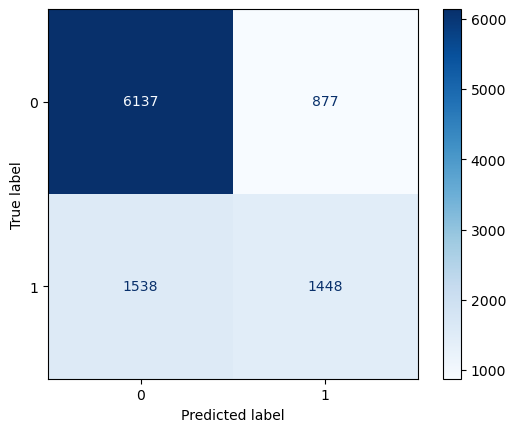

In [39]:
cm = confusion_matrix(y_test, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap="Blues")
plt.show()

In [2]:
pip install voila

Note: you may need to restart the kernel to use updated packages.
